## Proof of Concept
The output is the df that gets generated, to be then made into a csv. I've set it up to 10... but it can be set to something larger. 

In [87]:
import os
import requests
import json
import pandas as pd
import random

def calculate_price(drink):
    premium_ingredients = ["Absinthe", "Grand Marnier", "Cointreau", "Chambord", "Campari",
                            "Green Chartreuse", "Añejo Rum", "Midori Melon Liqueur", "Frangelico",
                            "Galliano", "St. Germain Elderflower Liqueur", "Bailey's Irish Cream",
                            "Kahlua", "Amaretto", "Drambuie", "Benedictine", "Dom Pérignon",
                            "Patrón Tequila", "Château Margaux", "Hennessy Cognac"]

    base_price = 6.5 

    # Additional pricing based on factors
    price_per_ingredient = 0.75
    premium_charge = 2.5
    alcoholic_price_increase = 3 

    price = base_price + drink['num_ingredients'] * price_per_ingredient

    # surcharge for specific spirits
    for ingredient in drink['ingredients'].split(', '):
        if ingredient in premium_ingredients:
            price += premium_charge
            # Add a random factor for each premium ingredient
            price += random.uniform(-0.25, 1)

    # Add additional price for alcoholic drinks
    if drink['alcoholic']:
        price += alcoholic_price_increase

    # Add a general random factor
    price += random.uniform(-1, 1)

    return round(price, 2)


def generate_cocktail_dataframe(num_cocktails):
    cocktail_id = [] 
    names = []
    ingredients = [] 
    num_ingredients = []  
    alcoholic = []
    acidic = []
    caffiene = [] 
    category = []  
    glass = []  

    url = "https://www.thecocktaildb.com/api/json/v1/1/random.php"

    # Generate random cocktails that are valid
    while len(cocktail_id) < num_cocktails:
        r = requests.get(url)

        if r.status_code == 200:
            site_json = r.json()

            # Check if the response contains valid data
            if 'drinks' in site_json and site_json['drinks']:
                drink = site_json['drinks'][0]
                name = drink.get('strDrink')

                # Append the columns 
                cocktail_id.append(drink['idDrink'])
                names.append(name)

                # Extract ingredients (removing Nones)
                ingredients_raw = [drink.get(f'strIngredient{i}', '') for i in range(1, 16)]
                ingredients.append(', '.join(filter(None, ingredients_raw)))

                # Calculate and append the number of ingredients
                num_ingredients.append(len(list(filter(None, ingredients_raw))))

                # Convert "strAlcoholic" to boolean
                alcoholic_status = drink.get('strAlcoholic', '').lower() == 'alcoholic'
                alcoholic.append(alcoholic_status)

                # Check if any of the specified ingredients are in the list
                acidic_status = any(ingredient in ["Lemon", "Lime", "Orange"] for ingredient in ingredients_raw)
                acidic.append(acidic_status)

                caf_status = any(ingredient in ["Coffee", "Espresso"] for ingredient in ingredients_raw) 
                caffiene.append(caf_status)

                category.append(drink.get('strCategory', ''))
                glass.append(drink.get('strGlass', ''))

            else:
                continue

    # Create DataFrame
    df_cocktail = pd.DataFrame({
        "cocktail_id": cocktail_id,
        "cocktail_name": names,
        "num_ingredients": num_ingredients,
        "ingredients": ingredients,
        "alcoholic": alcoholic,
        "acidic": acidic,
        "caffiene": caffiene, 
        "category": category, 
        "glass": glass
    })  

    # Apply the function to calculate prices
    df_cocktail['price'] = df_cocktail.apply(calculate_price, axis=1)

    # Drop duplicates based on 'cocktail_id'
    df_cocktail = df_cocktail.drop_duplicates(subset=['cocktail_id'])

    csv_filename = "cocktails_result.csv"
    csv_path = os.path.join(os.getcwd(), csv_filename)
    df_cocktail.to_csv(csv_path, index=False)
    print(f"Data saved to {csv_path}")

    return df_cocktail


generate_cocktail_dataframe(10)


Data saved to c:\Users\andre\Desktop\Personal\CocktailDB_API\cocktails_result.csv


,cocktail_id,cocktail_name,num_ingredients,ingredients,alcoholic,acidic,caffiene,category,glass,price
0,14578,Amaretto Sunrise,3,"Amaretto, Orange juice, Grenadine",True,False,False,Ordinary Drink,Collins Glass,14.25
1,15300,3-Mile Long Island Iced Tea,9,"Gin, Light rum, Tequila, Triple sec, Vodka, Co...",True,True,False,Ordinary Drink,Collins Glass,16.16
2,11690,Mai Tai,5,"Light rum, Orgeat syrup, Triple sec, Sweet and...",True,False,False,Ordinary Drink,Collins glass,12.88
3,11251,City Slicker,3,"Brandy, Triple sec, Lemon juice",True,False,False,Ordinary Drink,Cocktail glass,12.28
4,12656,Banana Strawberry Shake,5,"Strawberries, Banana, Yoghurt, Milk, Honey",False,False,False,Shake,Highball Glass,9.97
5,13499,Oreo Mudslide,5,"Vodka, Kahlua, Baileys irish cream, Vanilla ic...",True,False,False,Ordinary Drink,Collins Glass,17.64
6,16100,Amaretto Stone Sour Alternative,4,"Sour mix, Amaretto, Tequila, Orange juice",True,False,False,Other / Unknown,Highball glass,15.59
7,12758,Gagliardo,4,"Peach Vodka, Lemon juice, Galliano, Sirup of r...",True,False,False,Cocktail,Cocktail glass,16.08
8,11149,Boxcar,5,"Gin, Triple sec, Lemon juice, Grenadine, Egg w...",True,False,False,Ordinary Drink,Whiskey sour glass,13.18
9,11670,Lord And Lady,2,"Dark rum, Tia maria",True,False,False,Ordinary Drink,Old-fashioned glass,10.54


In [88]:
df_cocktails = generate_cocktail_dataframe(100)
df_cocktails

Data saved to c:\Users\andre\Desktop\Personal\CocktailDB_API\cocktails_result.csv


,cocktail_id,cocktail_name,num_ingredients,ingredients,alcoholic,acidic,caffiene,category,glass,price
0,17181,Dirty Martini,5,"Vodka, Dry Vermouth, Olive Brine, Lemon, Olive",True,True,False,Cocktail,Cocktail glass,13.95
1,12774,Masala Chai,9,"Water, Tea, Ginger, Cardamom, Cloves, Cinnamon...",False,False,False,Coffee / Tea,Coffee Mug,12.84
2,17015,Irish Russian,4,"Vodka, Kahlua, Coca-Cola, Guinness stout",True,False,False,Beer,Highball glass,15.83
3,12091,Rum Screwdriver,2,"Light rum, Orange juice",True,False,False,Ordinary Drink,Highball glass,11.45
4,11369,Flying Scotchman,4,"Scotch, Sweet Vermouth, Bitters, Sugar syrup",True,False,False,Ordinary Drink,Cocktail glass,11.99
...,...,...,...,...,...,...,...,...,...,...
94,17830,Corn n Oil,5,"Lime, Falernum, Angostura Bitters, Añejo rum, ...",True,True,False,Cocktail,Old-fashioned glass,12.54
96,14272,Addison Special,3,"Vodka, Grenadine, Orange juice",True,False,False,Cocktail,Old-fashioned glass,11.13
97,17203,Kir,2,"Creme de Cassis, Champagne",True,False,False,Ordinary Drink,Wine Glass,10.60
98,11558,Japanese Fizz,6,"Blended whiskey, Lemon, Powdered sugar, Port, ...",True,True,False,Ordinary Drink,Highball glass,14.60


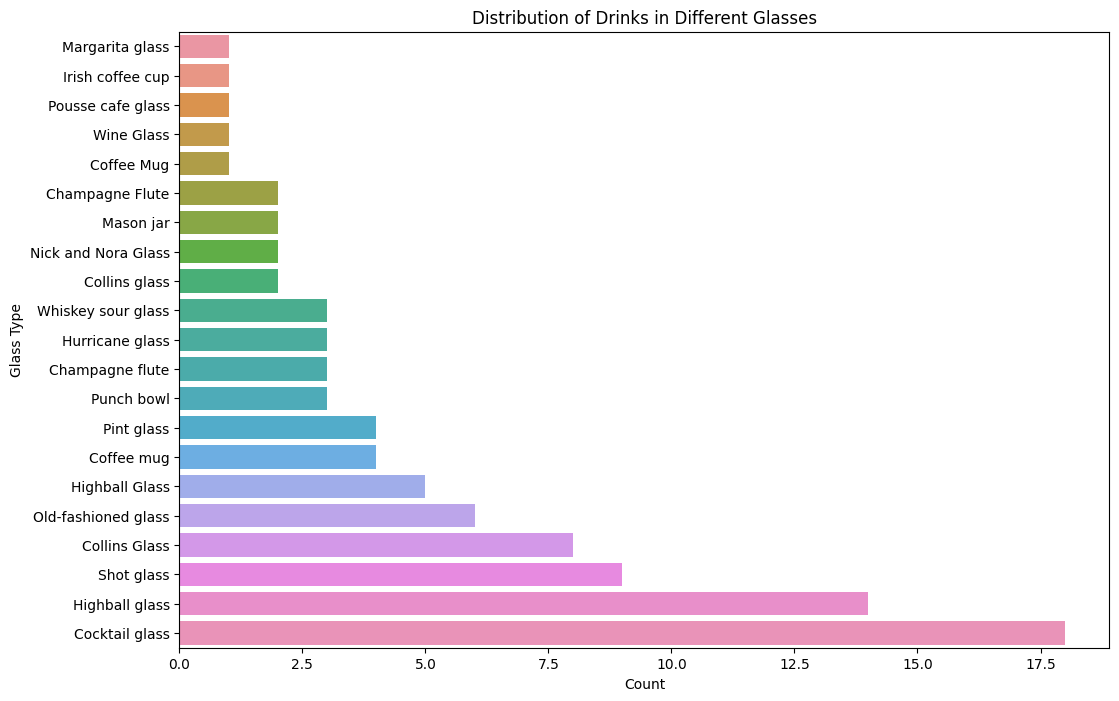

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

ordered_glass = df_cocktails['glass'].value_counts().index[::-1]

plt.figure(figsize=(12, 8))
sns.countplot(y='glass', data=df_cocktails, order=ordered_glass)
plt.title('Distribution of Drinks in Different Glasses')
plt.xlabel('Count')
plt.ylabel('Glass Type')
plt.show()


In [86]:
import altair as alt

alt.Chart(df_cocktails).mark_point(filled=True, opacity=0.6).encode(
    x='num_ingredients',
    y='price',
    color='acidic'
    #  size=alt.Size('price:Q', title='Price', scale=alt.Scale(range=[0.01, 300]))
)

alt.Chart(...)

In [61]:
df_cocktails[df_cocktails['num_ingredients'] > 10]

,cocktail_id,cocktail_name,num_ingredients,ingredients,alcoholic,acidic,caffiene,category,glass,price
13,12792,Amaretto Liqueur,11,"Sugar, Water, Apricot, Almond flavoring, Grain...",True,False,False,Homemade Liqueur,Collins Glass,18.71
67,12910,Egg Nog #4,11,"Egg yolk, Sugar, Milk, Light rum, Bourbon, Van...",False,False,False,Punch / Party Drink,Punch bowl,13.76
